决策树

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [3]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer.data.shape

(569, 30)

In [6]:
print('Sample counts per class:\n{}'.format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(random_state=0,max_depth=4)
clf = tree.fit(X_train, y_train)
clf.score(X_test, y_test)
#clf.score(X_train, y_train)

0.992462311557789

In [26]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, rounded=True, special_characters=True,impurity=False)
graph = graphviz.Source(dot_data)
graph.render("cancer")

'cancer.pdf'

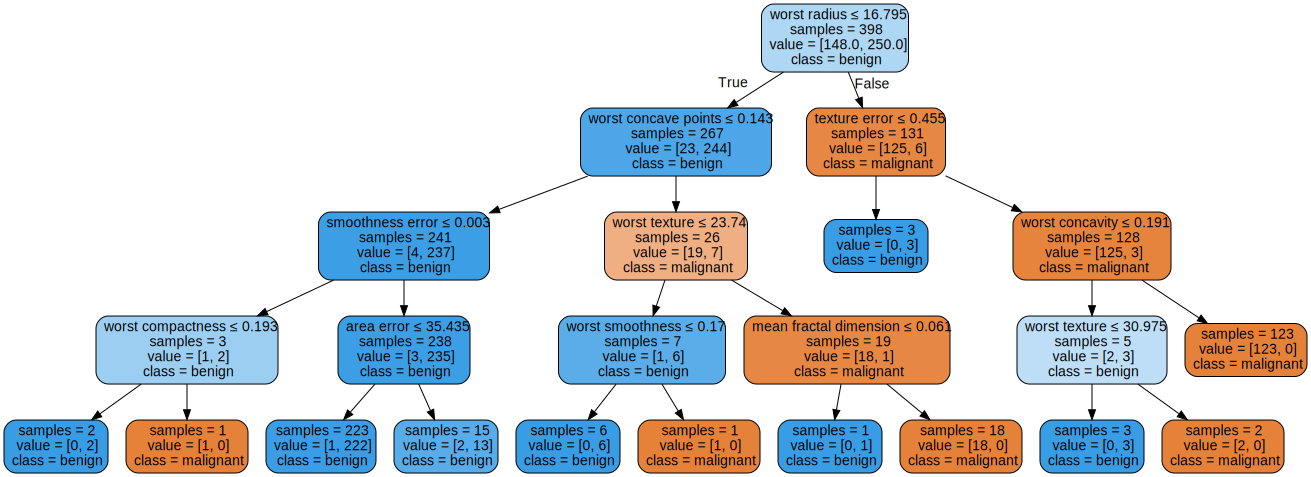

In [28]:
graph

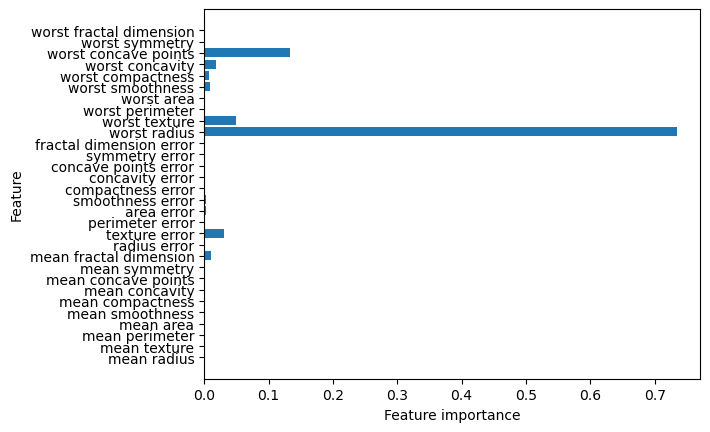

In [30]:
%matplotlib inline
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importance(clf)    